In [27]:
import numpy as np
import pandas as pd
import segyio
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import AnchoredText

In [2]:
matplotlib.rcParams['figure.figsize'] = (11.75, 8.5)

In [12]:
seismic_path = r'C:\Users\Dunbar\Dropbox\Work\RockPhysics\QSI\Quantitative_Seismic_Interpretation\Project_data'
near_sgy = '3d_nearstack.sgy'
far_sgy = '3d_farstack.sgy'

nears = seismic_path+"\\"+near_sgy
fars = seismic_path+"\\"+far_sgy

print(f"nears: {nears}")
print(f"fars: {fars}")

nears: C:\Users\Dunbar\Dropbox\Work\RockPhysics\QSI\Quantitative_Seismic_Interpretation\Project_data\3d_nearstack.sgy
fars: C:\Users\Dunbar\Dropbox\Work\RockPhysics\QSI\Quantitative_Seismic_Interpretation\Project_data\3d_farstack.sgy


In [13]:
f = segyio.open(nears, ignore_geometry=True)
segyio.tools.wrap(f.text[0])

'C 1 CLIENT                        COMPANY                       CREW NO\nC 2 LINE            AREA                        MAP ID\nC 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER\nC 4 INSTRUMENT: MFG            MODEL            SERIAL NO\nC 5 DATA TRACES/RECORD        AUXILIARY TRACES/RECORD         CDP FOLD\nC 6 SAMPLE INTERNAL         SAMPLES/TRACE       BITS/IN      BYTES/SAMPLE\nC 7 RECORDING FORMAT        FORMAT THIS REEL        MEASUREMENT SYSTEM\nC 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED\nC 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER\nC10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT\nC11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL\nC12     PATTERN:                           LENGTH        WIDTH\nC13 SWEEP: START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE\nC14 TAPER: START LENGTH       MS  END LENGTH       MS  TYPE\nC15 SPREAD: OFFSET        MAX DISTANCE       

In [14]:
print(segyio.tools.wrap(f.text[0]))

C 1 CLIENT                        COMPANY                       CREW NO
C 2 LINE            AREA                        MAP ID
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER
C 4 INSTRUMENT: MFG            MODEL            SERIAL NO
C 5 DATA TRACES/RECORD        AUXILIARY TRACES/RECORD         CDP FOLD
C 6 SAMPLE INTERNAL         SAMPLES/TRACE       BITS/IN      BYTES/SAMPLE
C 7 RECORDING FORMAT        FORMAT THIS REEL        MEASUREMENT SYSTEM
C 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED
C 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER
C10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT
C11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL
C12     PATTERN:                           LENGTH        WIDTH
C13 SWEEP: START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE
C14 TAPER: START LENGTH       MS  END LENGTH       MS  TYPE
C15 SPREAD: OFFSET        MAX DISTANCE        GROUP INTERVAL

In [15]:
f.samples[:5]

array([ 0.,  4.,  8., 12., 16.])

In [16]:
with segyio.open(nears) as segyf:
    n_traces = segyf.tracecount
    sample_rate = segyio.tools.dt(segyf)
    n_samples = segyf.samples.size
    n_il = len(segyf.iline)

RuntimeError: unable to find sorting.Check iline, (189) and xline (193) in case you are sure the file is a 3D sorted volume

In [17]:
f = segyio.open(nears, ignore_geometry=True)
ntraces = len(f.trace)
inlines = []
crosslines = []

for i in range(ntraces):
    headeri = f.header[i]
    inlines.append(headeri[segyio.su.iline])
    crosslines.append(headeri[segyio.su.xline])
    
print(f"{ntraces} traces")


25351 traces


In [18]:
print(f"first 10 inlines: {inlines[:10]}")

first 10 inlines: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
print(f"first 10 crosslines: {crosslines[:10]}")

first 10 crosslines: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
!pip install segysak

In [22]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead

C:\Users\Dunbar\anaconda3\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [23]:
get_segy_texthead(nears)

Text HeaderC 1 CLIENT                        COMPANY                       CREW NO
C 2 LINE            AREA                        MAP ID
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER
C 4 INSTRUMENT: MFG            MODEL            SERIAL NO
C 5 DATA TRACES/RECORD        AUXILIARY TRACES/RECORD         CDP FOLD
C 6 SAMPLE INTERNAL         SAMPLES/TRACE       BITS/IN      BYTES/SAMPLE
C 7 RECORDING FORMAT        FORMAT THIS REEL        MEASUREMENT SYSTEM
C 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED
C 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER
C10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT
C11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL
C12     PATTERN:                           LENGTH        WIDTH
C13 SWEEP: START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE
C14 TAPER: START LENGTH       MS  END LENGTH       MS  TYPE
C15 SPREAD: OFFSET        MAX DISTANCE        GROUP INTERVAL
C16 GEOPHONES: PER GROUP     SPACING     FREQUENCY     MFG          MODEL
C17     PATTERN:                           LENGTH        WIDTH
C18 TRACES SORTED BY: RECORD     CDP     OTHER
C19 AMPLITUDE RECOVEY: NONE      SPHERICAL DIV       AGC    OTHER
C20 MAP PROJECTION                      ZONE ID       COORDINATE UNITS
C21 PROCESSING:
C22 PROCESSING:
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [25]:
scan = segy_header_scan(nears, max_traces_scan=2000)
scan

  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,53789.2900,1180.882351,51866.0,52630.75,53660.5,54690.25,55720.0
TRACE_SEQUENCE_FILE,5,2000.0,53789.2900,1180.882351,51866.0,52630.75,53660.5,54690.25,55720.0
FieldRecord,9,2000.0,181.3070,385.232324,0.0,0.00,0.0,0.00,1158.0
TraceNumber,13,2000.0,382.4195,238.809379,31.0,229.00,361.0,557.00,754.0
EnergySourcePoint,17,2000.0,181.3070,385.232324,0.0,0.00,0.0,0.00,1158.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0


In [28]:
with pd.option_context("display.max_rows", 100):
    display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,5.378929e+04,1180.882351,51866.0,52630.75,53660.5,54690.25,55720.0
TRACE_SEQUENCE_FILE,5,2000.0,5.378929e+04,1180.882351,51866.0,52630.75,53660.5,54690.25,55720.0
FieldRecord,9,2000.0,1.813070e+02,385.232324,0.0,0.00,0.0,0.00,1158.0
TraceNumber,13,2000.0,3.824195e+02,238.809379,31.0,229.00,361.0,557.00,754.0
EnergySourcePoint,17,2000.0,1.813070e+02,385.232324,0.0,0.00,0.0,0.00,1158.0
CDP,21,2000.0,1.749028e+03,144.420233,1500.0,1624.00,1749.0,1874.00,2000.0
CDP_TRACE,25,2000.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
NSummedTraces,31,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
NStackedTraces,33,2000.0,3.200000e+01,0.000000,32.0,32.00,32.0,32.00,32.0


In [29]:
trace_headers = segy_header_scrape(nears)
trace_headers.columns

  0%|          | 0.00/25.4k [00:00<?, ? traces/s]

Index(['TRACE_SEQUENCE_LINE', 'TRACE_SEQUENCE_FILE', 'FieldRecord',
       'TraceNumber', 'EnergySourcePoint', 'CDP', 'CDP_TRACE',
       'TraceIdentificationCode', 'NSummedTraces', 'NStackedTraces', 'DataUse',
       'offset', 'ReceiverGroupElevation', 'SourceSurfaceElevation',
       'SourceDepth', 'ReceiverDatumElevation', 'SourceDatumElevation',
       'SourceWaterDepth', 'GroupWaterDepth', 'ElevationScalar',
       'SourceGroupScalar', 'SourceX', 'SourceY', 'GroupX', 'GroupY',
       'CoordinateUnits', 'WeatheringVelocity', 'SubWeatheringVelocity',
       'SourceUpholeTime', 'GroupUpholeTime', 'SourceStaticCorrection',
       'GroupStaticCorrection', 'TotalStaticApplied', 'LagTimeA', 'LagTimeB',
       'DelayRecordingTime', 'MuteTimeStart', 'MuteTimeEND',
       'TRACE_SAMPLE_COUNT', 'TRACE_SAMPLE_INTERVAL', 'GainType',
       'InstrumentGainConstant', 'InstrumentInitialGain', 'Correlated',
       'SweepFrequencyStart', 'SweepFrequencyEnd', 'SweepLength', 'SweepType',
       'Swee

In [30]:
trace_headers

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,51866,51866,0,491,0,1500,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
1,51867,51867,826,492,826,1502,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
2,51868,51868,827,425,827,1504,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
3,51869,51869,0,491,0,1506,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
4,51870,51870,830,426,830,1508,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25346,103712,103712,0,578,0,1992,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
25347,103713,103713,0,579,0,1994,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
25348,103714,103714,0,556,0,1996,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0
25349,103715,103715,0,491,0,1998,1,1,0,32,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# byte locations[21-26, 41-44, 73-76, 77-80]
trace_headers[['CDP', 'ReceiverGroupElevation', 'SourceX', 'SourceY']]

,CDP,ReceiverGroupElevation,SourceX,SourceY
0,1500,1300000,420414,6506366
1,1502,1300000,420426,6506382
2,1504,1300000,420444,6506406
3,1506,1300000,420462,6506431
4,1508,1300000,420446,6506458
...,...,...,...,...
25346,1992,1500000,421870,6512717
25347,1994,1500000,421884,6512736
25348,1996,1500000,421897,6512756
25349,1998,1500000,421913,6512778


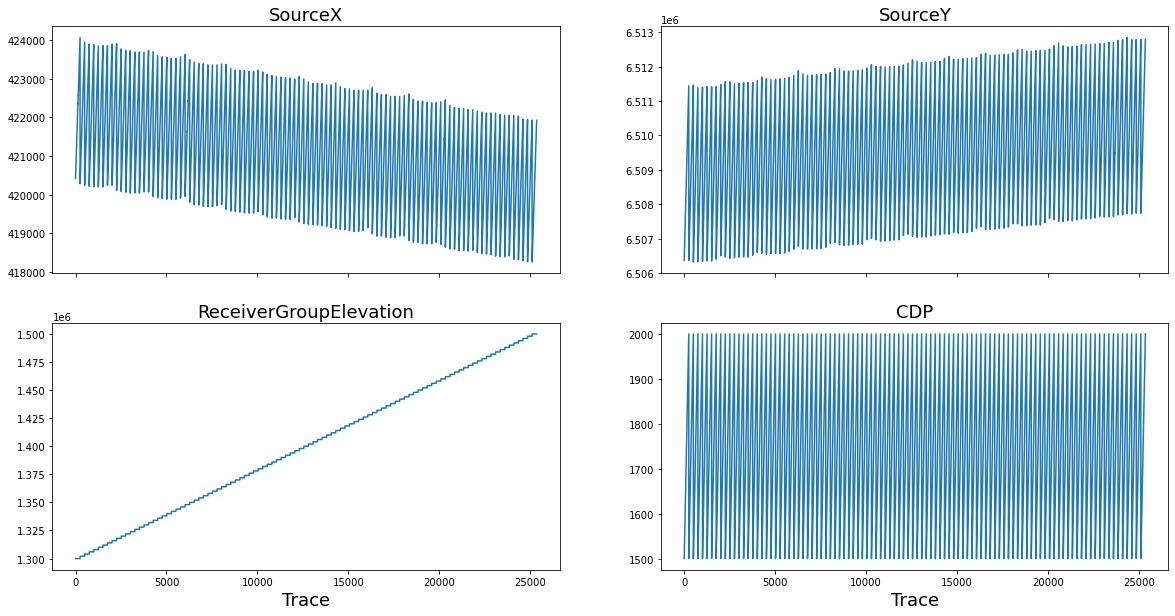

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharex=True)

for ax, prop in zip(axs.ravel(), ["SourceX", "SourceY", "ReceiverGroupElevation", "CDP"]):
    ax.plot(trace_headers[prop])
    ax.set_title(prop, fontdict={"fontsize":18})
    
for ax in axs[1,:]:
    ax.set_xlabel("Trace", fontdict={"fontsize":18})

In [37]:
# byte locations[21-26, 41-44, 81-84, 85-88]
trace_headers[['CDP', 'ReceiverGroupElevation', 'GroupX', 'GroupY']]

,CDP,ReceiverGroupElevation,GroupX,GroupY
0,1500,1300000,420004,6505965
1,1502,1300000,420021,6505986
2,1504,1300000,420032,6506001
3,1506,1300000,420048,6506023
4,1508,1300000,420088,6506033
...,...,...,...,...
25346,1992,1500000,421454,6512286
25347,1994,1500000,421470,6512308
25348,1996,1500000,421481,6512324
25349,1998,1500000,421496,6512346


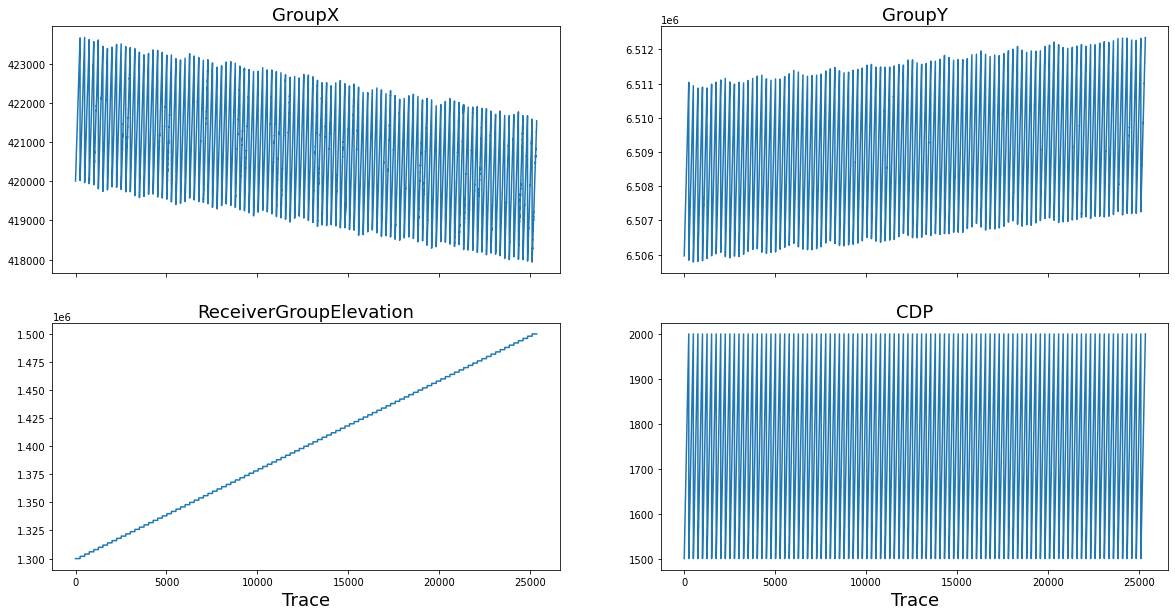

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharex=True)

#                 byte locations  []
for ax, prop in zip(axs.ravel(), ["GroupX", "GroupY", "ReceiverGroupElevation", "CDP"]):
    ax.plot(trace_headers[prop])
    ax.set_title(prop, fontdict={"fontsize":18})
    
for ax in axs[1,:]:
    ax.set_xlabel("Trace", fontdict={"fontsize":18})

In [39]:
from segysak.segy import segy_loader
help(segy_loader)

Help on function segy_loader in module segysak.segy._segy_loader:

segy_loader(segyfile, cdp=None, iline=None, xline=None, cdpx=None, cdpy=None, offset=None, vert_domain='TWT', data_type='AMP', ix_crop=None, cdp_crop=None, xy_crop=None, z_crop=None, return_geometry=False, silent=False, extra_byte_fields=None, head_df=None, **segyio_kwargs)
    Load SEG-Y file into xarray.Dataset
    
    The output dataset has the following structure
        Dimensions:
            cdp/iline - CDP or Inline axis
            xline - Xline axis
            twt/depth - The vertical axis
            offset - Offset/Angle Axis
        Coordinates:
            iline - The inline numbering
            xline - The xline numbering
            cdp_x - Eastings
            cdp_y - Northings
            cdp - Trace Number for 2d
        Variables
            data - The data volume
        Attributes:
            ns - number of samples vertical
            sample_rate - sample rate in ms/m
            test - text h

In [40]:
seismic_vol = segy_loader(nears)

  0%|          | 0.00/25.4k [00:00<?, ? traces/s]

                        byte_loc    count          mean           std  \
TRACE_SEQUENCE_LINE            1  25351.0  7.779100e+04  15044.327101   
TRACE_SEQUENCE_FILE            5  25351.0  7.779100e+04  15044.327101   
FieldRecord                    9  25351.0  1.921123e+02    394.060648   
TraceNumber                   13  25351.0  3.698050e+02    230.804810   
EnergySourcePoint             17  25351.0  1.921123e+02    394.060648   
CDP                           21  25351.0  1.750000e+03    144.916626   
ReceiverGroupElevation        41  25351.0  1.400000e+06  58310.669026   
SourceX                       73  25351.0  4.211156e+05   1216.404587   
SourceY                       77  25351.0  6.509573e+06   1531.398814   
GroupX                        81  25351.0  4.207963e+05   1210.920244   
GroupY                        85  25351.0  6.509085e+06   1530.294762   
SourceStaticCorrection        99  25351.0  3.957725e+03    386.556264   

                              min        25%      

Converting SEGY:   0%|          | 0.00/25.4k [00:00<?, ? traces/s]

In [41]:
print(seismic_vol)

<xarray.Dataset>
Dimensions:  (cdp: 25351, twt: 250)
Coordinates:
  * cdp      (cdp) int64 0 1 2 3 4 5 6 ... 25345 25346 25347 25348 25349 25350
  * twt      (twt) float64 0.0 4.0 8.0 12.0 16.0 ... 984.0 988.0 992.0 996.0
Data variables:
    data     (cdp, twt) float32 87.0 -2.478e+03 -2.54e+03 ... -516.0 32.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         3d_nearstack.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5331.089177985022, -5256.459429383709, -2147.36868...
    coord_scalar:        1.0


In [43]:
seismic_vol = segy_loader(
    nears,
    iline=41, xline=21, cdpx=81, cdpy=85)

  0%|          | 0.00/25.4k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is ReceiverGroupElevation


Converting SEGY:   0%|          | 0.00/25.4k [00:00<?, ? traces/s]

In [44]:
print(seismic_vol)

<xarray.Dataset>
Dimensions:  (iline: 101, xline: 251, twt: 250)
Coordinates:
  * iline    (iline) uint32 1300000 1302000 1304000 ... 1496000 1498000 1500000
  * xline    (xline) uint16 1500 1502 1504 1506 1508 ... 1994 1996 1998 2000
  * twt      (twt) float64 0.0 4.0 8.0 12.0 16.0 ... 984.0 988.0 992.0 996.0
    cdp_x    (iline, xline) float32 4.2e+05 4.2e+05 ... 4.215e+05 4.215e+05
    cdp_y    (iline, xline) float32 6.506e+06 6.506e+06 ... 6.512e+06 6.512e+06
Data variables:
    data     (iline, xline, twt) float32 87.0 -2.478e+03 ... -516.0 32.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         3d_nearstack.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5300.628

In [46]:
seismic_vol.sel(iline=1376000)

<xarray.Dataset>
Dimensions:  (xline: 251, twt: 250)
Coordinates:
    iline    uint32 1376000
  * xline    (xline) uint16 1500 1502 1504 1506 1508 ... 1994 1996 1998 2000
  * twt      (twt) float64 0.0 4.0 8.0 12.0 16.0 ... 984.0 988.0 992.0 996.0
    cdp_x    (xline) float32 4.192e+05 4.192e+05 ... 4.228e+05 4.228e+05
    cdp_y    (xline) float32 6.506e+06 6.506e+06 ... 6.511e+06 6.511e+06
Data variables:
    data     (xline, twt) float32 -1.383e+03 -2.91e+03 ... 1.636e+03 1.758e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         3d_nearstack.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5300.628458809641, -5188.726996141642, -2045.09867...
    coord_scalar:        1.0

In [48]:
seismic_vol.sel(iline=1468000, xline=1848)

<xarray.Dataset>
Dimensions:  (twt: 250)
Coordinates:
    iline    uint32 1468000
    xline    uint16 1848
  * twt      (twt) float64 0.0 4.0 8.0 12.0 16.0 ... 984.0 988.0 992.0 996.0
    cdp_x    float32 4.209e+05
    cdp_y    float32 6.511e+06
Data variables:
    data     (twt) float32 -897.0 965.0 679.0 ... -581.0 -1.568e+03 -1.055e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         3d_nearstack.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5300.628458809641, -5188.726996141642, -2045.09867...
    coord_scalar:        1.0